In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
df.describe()
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
X = df.iloc[:,:-1]
y = df.Outcome.values.reshape(-1,1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=1,)


In [35]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf= clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [36]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.7705627705627706


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [38]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7705627705627706
Precision: 0.7105263157894737
Recall: 0.6352941176470588
F1 Score: 0.6708074534161491


In [39]:
%matplotlib inline
from sklearn.tree import plot_tree

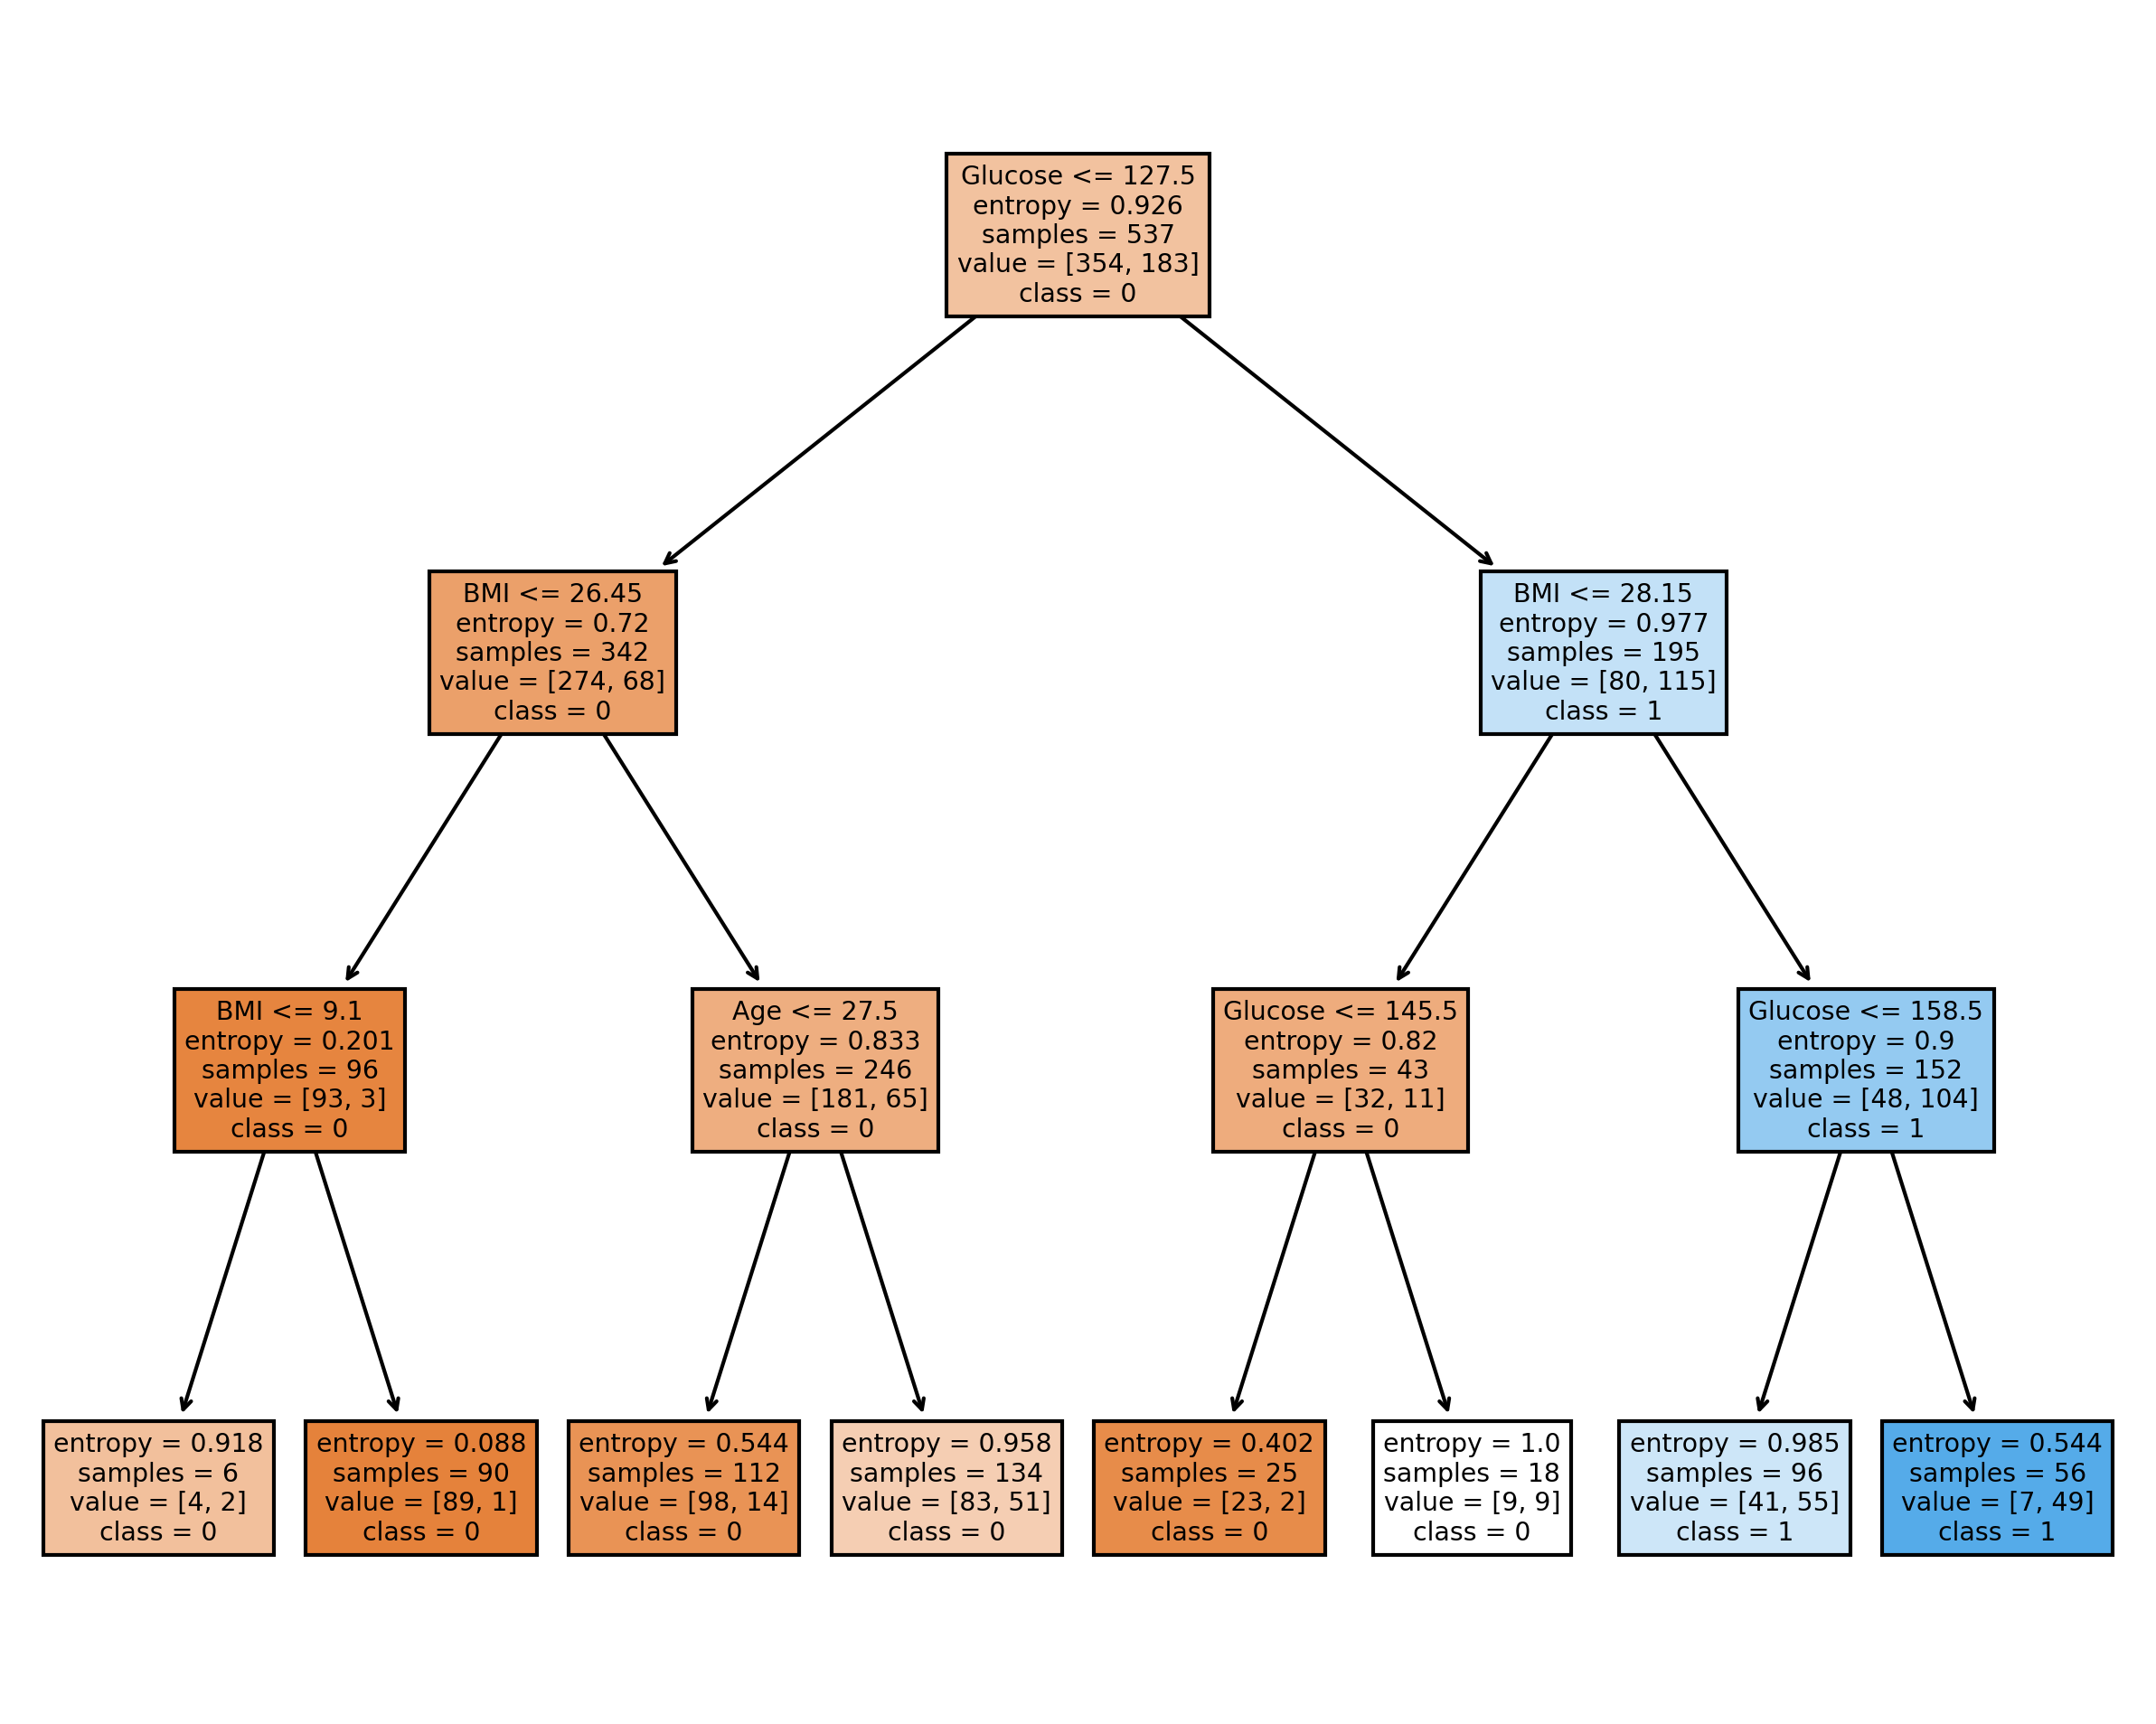

In [40]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']

# Create a figure to save the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300)

# Plot the decision tree
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, ax=axes)


# Save the plot as an image
fig.savefig('Tree2.png')